In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read File
#Handle Null Values
#Preprocessing 

In [3]:
df = pd.read_csv("D:/4th year/Grad Project/Datasets/General/Twitter_Data.csv")

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [6]:
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
df = df.dropna(subset=['clean_text'])

In [9]:
df.isnull().sum()

clean_text    0
category      7
dtype: int64

In [10]:
average_value = df['category'].mean()

# Replace null values with the calculated average
df['category'].fillna(average_value, inplace=True)

In [11]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [12]:
# Function to map float sentiment scores to string labels
def map_sentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

# Apply the mapping function to the 'sentiment_score' column
df['sentiment_label'] = df['category'].apply(map_sentiment)

# Display the updated DataFrame
print(df[['category', 'sentiment_label']])


        category sentiment_label
0           -1.0        negative
1            0.0         neutral
2            1.0        positive
3            1.0        positive
4            1.0        positive
...          ...             ...
162975      -1.0        negative
162976      -1.0        negative
162977       0.0         neutral
162978       0.0         neutral
162979       1.0        positive

[162976 rows x 2 columns]


In [13]:
df.head()

,clean_text,category,sentiment_label
0,when modi promised “minimum government maximum...,-1.0,negative
1,talk all the nonsense and continue all the dra...,0.0,neutral
2,what did just say vote for modi welcome bjp t...,1.0,positive
3,asking his supporters prefix chowkidar their n...,1.0,positive
4,answer who among these the most powerful world...,1.0,positive


In [14]:
# Isolate Tweet Texts
tweets = df["clean_text"]

In [15]:
df['clean_text']=df['clean_text'].str.lower()

In [16]:
# Download the 'stopwords' resource
nltk.download('stopwords')

# Load the stopwords list for English
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [18]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['clean_text'] = df['clean_text'].apply(lambda text: cleaning_stopwords(text))
df['clean_text'].head()

0    modi promised “minimum government maximum gove...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object

In [19]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [20]:
df['clean_text']= df['clean_text'].apply(lambda x: cleaning_punctuations(x))
df['clean_text'].tail()

162975    456 crores paid neerav modi recovered congress...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [21]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [22]:
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_repeating_char(x))
df['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [23]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [24]:
df['clean_text']= df['clean_text'].apply(lambda x: cleaning_email(x))
df['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [25]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [26]:
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_URLs(x))
df['clean_text'].tail()

162975    456 crores paid nerav modi recovered congres l...
162976    dear rs terorist payal gawar modi kiling 10 pl...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [28]:
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))
df['clean_text'].tail()

162975     crores paid nerav modi recovered congres lead...
162976    dear rs terorist payal gawar modi kiling  plus...
162977                         cover interaction forum left
162978    big project came india modi dream project hape...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [29]:
tokenizer = RegexpTokenizer(r'\w+')
df['clean_text'] = df['clean_text'].apply(tokenizer.tokenize)

In [30]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df['clean_text']= df['clean_text'].apply(lambda x: stemming_on_text(x))

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' resource
nltk.download('wordnet')

# Create WordNetLemmatizer
lm = WordNetLemmatizer()

# Define lemmatizer function
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

# Apply lemmatizer function to the 'text' column in the 'data' DataFrame
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df.head()

,clean_text,category,sentiment_label
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,neutral
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive
4,"[answer, among, powerful, world, leader, today...",1.0,positive


In [33]:
# Assuming your CSV file has 'text' column for reviews and 'sentiment' column for labels
X = df['clean_text']
y = df['sentiment_label']

In [34]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
df.head()

,clean_text,category,sentiment_label
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,neutral
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive
4,"[answer, among, powerful, world, leader, today...",1.0,positive


In [37]:
# Iterate over each row and concatenate values in 'your_column' with spaces
result_list = []
for index, row in df.iterrows():
    row_values = row['clean_text']
    result_list.append(' '.join(map(str, row_values)))

# Add the result_list as a new column in the DataFrame
df['final_clean_text'] = result_list

df.head()

,clean_text,category,sentiment_label,final_clean_text
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative,modi promised minimum government maximum gover...
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,neutral,talk nonsense continue drama vote modi
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive,say vote modi welcome bjp told rahul main camp...
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive,asking suporters prefix chowkidar name modi gr...
4,"[answer, among, powerful, world, leader, today...",1.0,positive,answer among powerful world leader today trump...


In [113]:
################################################################################################################################

In [42]:
################################################################################################################################

In [75]:
#Vader

from sklearn.metrics import accuracy_score
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Isolate Tweet Texts
tweets = df["final_clean_text"]

# Remove @'s to Make Sentiment Analysis more Effective
#def remove_ats(tweet):
#    """Removes the @ symbol and the word following it from a tweet"""
#    return re.sub(r"@\w+", "", tweet)

#tweets_without_at = [remove_ats(text) for text in tweets]

# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through the texts and get the sentiment scores for each one
for tweet, original_sentiment in zip(tweets_without_at, df['sentiment_label']):
    scores = analyzer.polarity_scores(tweet)
    
    if scores.get('compound') > 0:
        predicted_labels.append('positive')
    elif scores.get('compound') < 0:
        predicted_labels.append('negative')
    else:
        predicted_labels.append('neutral')

    true_labels.append(original_sentiment)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 55.82%


In [76]:
###############################################################################################################################

In [113]:
#Random Forest

import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['final_clean_text'], df['sentiment_label'], test_size=0.2, random_state=42)

# Use TF-IDF for feature representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 84.67%
              precision    recall  f1-score   support

    negative       0.85      0.67      0.75      7127
     neutral       0.83      0.93      0.88     10960
    positive       0.86      0.87      0.86     14509

    accuracy                           0.85     32596
   macro avg       0.85      0.82      0.83     32596
weighted avg       0.85      0.85      0.84     32596



In [114]:
###############################################################################################################################

In [115]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [116]:
# Assuming your CSV file has 'text' column for reviews and 'sentiment' column for labels
X = df['final_clean_text']
y = df['sentiment_label']

In [117]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [119]:
# Build an SVM model
svm_model = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and hyperparameters

In [120]:
# Train the model
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [121]:
# Make predictions
y_pred = svm_model.predict(X_test_tfidf)

In [122]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 88.50%


In [123]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.79      0.82      7127
     neutral       0.86      0.96      0.91     10960
    positive       0.92      0.88      0.90     14509

    accuracy                           0.89     32596
   macro avg       0.88      0.87      0.88     32596
weighted avg       0.89      0.89      0.88     32596





confusion matrix




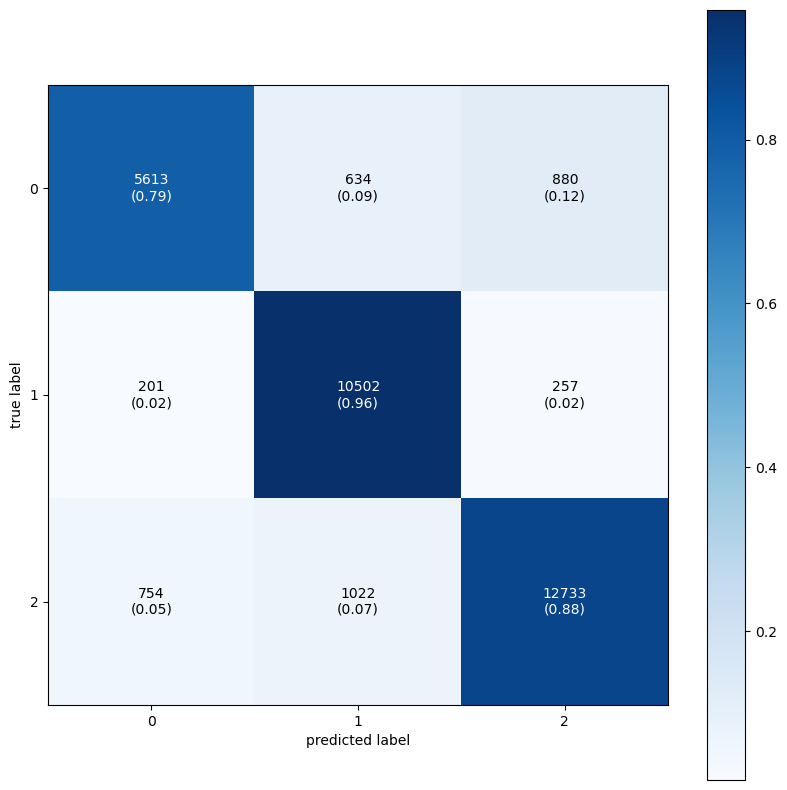

In [124]:
# Print confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [44]:
################################################################################################################################

In [41]:
#Naive Bayes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['final_clean_text'], df['sentiment_label'], test_size=0.2, random_state=42)

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_features, train_labels)

# Make predictions on the test set
predictions = naive_bayes_classifier.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

classification_report_result = classification_report(test_labels, predictions)
print('Classification Report:')
print(classification_report_result)


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.59      0.65      7127
     neutral       0.85      0.59      0.70     10960
    positive       0.68      0.89      0.77     14509

    accuracy                           0.73     32596
   macro avg       0.75      0.69      0.71     32596
weighted avg       0.75      0.73      0.72     32596





confusion matrix




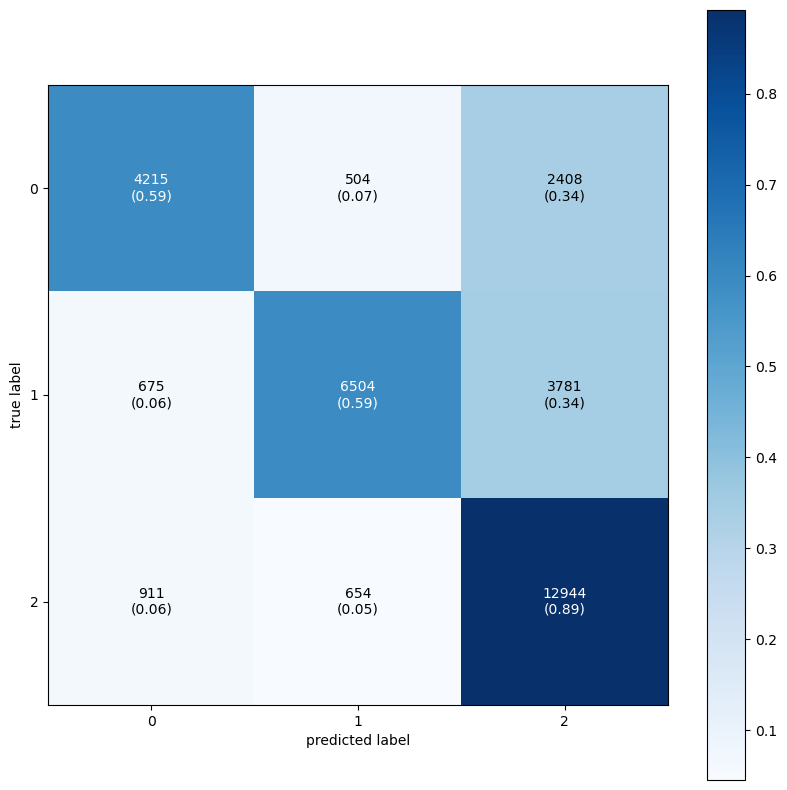

In [46]:
# Print confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(test_labels, predictions)

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [1]:
################################################################################################################################

In [38]:
################################################################################################################################

In [39]:
#Transformers

In [40]:
#!pip install sentencepiece

In [41]:
#!pip install torch

In [44]:
import pandas as pd
from sklearn.metrics import classification_report
import torch
from transformers import BertTokenizer, BertForSequenceClassification, XLNetTokenizer, XLNetForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification, pipeline

In [46]:
# Load pre-trained models and tokenizers
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased')

tokenizer_xlnet = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model_xlnet = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased')

tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base')

tokenizer_distillbert = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_distillbert = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.bias', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for prediction

In [47]:
# Sentiment analysis for each transformer model
def sentiment_analysis_bert(text):
    inputs = tokenizer_bert(text, return_tensors="pt")
    outputs = model_bert(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).item()
    return predictions

def sentiment_analysis_xlnet(text):
    inputs = tokenizer_xlnet(text, return_tensors="pt")
    outputs = model_xlnet(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1).item()
    return predictions

def sentiment_analysis_roberta(text):
    inputs = tokenizer_roberta(text, return_tensors="pt")
    outputs = model_roberta(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1).item()
    return predictions

def sentiment_analysis_distillbert(text):
    inputs = tokenizer_distillbert(text, return_tensors="pt")
    outputs = model_distillbert(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1).item()
    return predictions
# Map index to sentiment label
def map_to_sentiment_label(index):
    if index == 0:
        return 'Negative'
    elif index == 1:
        return 'Positive'
    else:
        return 'Neutral'

In [48]:
# Add new columns for sentiment analysis results
df['sentiment_bert'] = df['final_clean_text'].apply(sentiment_analysis_bert)

In [49]:
df['sentiment_xlnet'] = df['final_clean_text'].apply(sentiment_analysis_xlnet)

In [50]:
df['sentiment_roberta'] = df['final_clean_text'].apply(sentiment_analysis_roberta)

In [51]:
df['sentiment_distillbert'] = df['final_clean_text'].apply(sentiment_analysis_distillbert)

In [52]:
# Apply mapping to sentiment analysis results
df['sentiment_bert'] = df['sentiment_bert'].apply(map_to_sentiment_label)
df['sentiment_xlnet'] = df['sentiment_xlnet'].apply(map_to_sentiment_label)
df['sentiment_roberta'] = df['sentiment_roberta'].apply(map_to_sentiment_label)
df['sentiment_distillbert'] = df['sentiment_distillbert'].apply(map_to_sentiment_label)

In [53]:
df.head()

,clean_text,category,sentiment_label,final_clean_text,sentiment_bert,sentiment_xlnet,sentiment_roberta,sentiment_distillbert
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative,modi promised minimum government maximum gover...,Positive,Positive,Positive,Negative
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,neutral,talk nonsense continue drama vote modi,Positive,Positive,Positive,Negative
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive,say vote modi welcome bjp told rahul main camp...,Positive,Positive,Positive,Negative
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive,asking suporters prefix chowkidar name modi gr...,Positive,Positive,Positive,Negative
4,"[answer, among, powerful, world, leader, today...",1.0,positive,answer among powerful world leader today trump...,Positive,Positive,Positive,Negative


In [59]:
# Display classification report for each model
print("BERT Classification Report:")
print(classification_report(df['_label_'], df['sentiment_bert']))

print("\nXLNet Classification Report:")
print(classification_report(df['_label_'], df['sentiment_xlnet']))

print("\nRoBERTa Classification Report:")
print(classification_report(df['_label_'], df['sentiment_roberta']))

print("\nDistilBERT Classification Report:")
print(classification_report(df['_label_'], df['sentiment_distillbert']))

BERT Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     35509
     Neutral       0.00      0.00      0.00     55211
    Positive       0.44      1.00      0.61     72256

    accuracy                           0.44    162976
   macro avg       0.15      0.33      0.20    162976
weighted avg       0.20      0.44      0.27    162976


XLNet Classification Report:
              precision    recall  f1-score   support

    Negative       0.24      0.07      0.11     35509
     Neutral       0.00      0.00      0.00     55211
    Positive       0.44      0.94      0.60     72256

    accuracy                           0.43    162976
   macro avg       0.23      0.33      0.24    162976
weighted avg       0.25      0.43      0.29    162976


RoBERTa Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00     35509
     Neutral       0.00      0.00      

In [126]:
df.head()

,clean_text,category,sentiment_label,final_clean_text,sentiment_bert,sentiment_xlnet,sentiment_roberta,sentiment_distillbert
0,"[modi, promised, minimum, government, maximum,...",-1.0,negative,modi promised minimum government maximum gover...,1,1,0,0
1,"[talk, nonsense, continue, drama, vote, modi]",0.0,neutral,talk nonsense continue drama vote modi,1,1,0,0
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0,positive,say vote modi welcome bjp told rahul main camp...,1,1,0,0
3,"[asking, suporters, prefix, chowkidar, name, m...",1.0,positive,asking suporters prefix chowkidar name modi gr...,1,1,0,0
4,"[answer, among, powerful, world, leader, today...",1.0,positive,answer among powerful world leader today trump...,1,1,0,0


In [127]:
df['sentiment_bert'].unique()

array([1, 0], dtype=int64)

In [57]:
# Function to map float sentiment scores to string labels
def map_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the mapping function to the 'sentiment_score' column
df['_label_'] = df['category'].apply(map_sentiment)

# Display the updated DataFrame
print(df[['category', '_label_']])


        category   _label_
0           -1.0  Negative
1            0.0   Neutral
2            1.0  Positive
3            1.0  Positive
4            1.0  Positive
...          ...       ...
162975      -1.0  Negative
162976      -1.0  Negative
162977       0.0   Neutral
162978       0.0   Neutral
162979       1.0  Positive

[162976 rows x 2 columns]


In [3]:
data = pd.read_csv("D:/4th year/Grad Project/Datasets/General/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

In [4]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
data.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
data['label'].unique()

array([0, 4], dtype=int64)